# Eth Data Cleaning

#### Initial look at Ethereum historic data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('../data/eth_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timeOpen              3058 non-null   object 
 1   timeHigh              3058 non-null   object 
 2   timeLow               3058 non-null   object 
 3   name                  3058 non-null   float64
 4   open                  3058 non-null   float64
 5   high                  3058 non-null   float64
 6   low                   3058 non-null   float64
 7   close                 3058 non-null   float64
 8   volume                3058 non-null   float64
 9   marketCap             3058 non-null   float64
 10  onchain_transactions  3058 non-null   float64
 11  contracts_created     3058 non-null   int64  
 12  avg_gas_price         3058 non-null   float64
 13  avg_gas_limit         3058 non-null   float64
 14  avg_gas_used          3058 non-null   float64
dtypes: float64(11), int64

What does the 'name' column represent?
Let's take a look at its values

In [84]:
df.value_counts(df['name'])

name
2781.0    3058
Name: count, dtype: int64

We see all values for the name column are the same, so we can drop the column altogether

In [85]:
df = df.drop(['name'], axis=1)

While timeHigh and timeLow can provide useful insights for interday movements of price highs and lows, for our purposes of a macro analysis we only require one datetime column and we will be using timeOpen

In [86]:
df = df.drop(['timeHigh', 'timeLow'], axis=1)

We then need to change the timeOpen column to a datetime datatype, and I would also like to change its name to 'Date' as it makes more contextual sense

In [87]:
df = df.rename(columns={'timeOpen': 'date'})

In [88]:
df['date'] = pd.to_datetime(df['date'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3058 non-null   datetime64[ns]
 1   open                  3058 non-null   float64       
 2   high                  3058 non-null   float64       
 3   low                   3058 non-null   float64       
 4   close                 3058 non-null   float64       
 5   volume                3058 non-null   float64       
 6   marketCap             3058 non-null   float64       
 7   onchain_transactions  3058 non-null   float64       
 8   contracts_created     3058 non-null   int64         
 9   avg_gas_price         3058 non-null   float64       
 10  avg_gas_limit         3058 non-null   float64       
 11  avg_gas_used          3058 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 286.8 KB


For analysis, it may be worth getting the difference in the daily 'high' and 'low' to see how volatility changes over time. We can then drop 'high' and 'low'

Since we already know the price of Ethereum increases tremendously over the years, we will get the relative volatility.
We will get the percent difference relative to the low price rather than the absolute difference

In [91]:
df['daily_price_volatility'] = (df['high'] / df['low'])

In [92]:
df.head(3)

,date,open,high,low,close,volume,marketCap,onchain_transactions,contracts_created,avg_gas_price,avg_gas_limit,avg_gas_used,daily_price_volatility
0,2016-08-07,10.8592,11.0896,10.7800,10.9116,16551000.0,9.030269e+08,42955.0,194,2.214376e+10,109729.552997,29396.574299,1.028720
1,2016-08-06,10.9167,10.9376,10.2858,10.8811,16712600.0,9.001517e+08,41487.0,150,2.226101e+10,108266.673536,28383.119435,1.063369
2,2016-08-05,11.0190,11.1764,10.7632,10.9254,15487900.0,9.034714e+08,43212.0,268,2.270972e+10,118076.113695,30177.412085,1.038390


In [93]:
df = df.drop(['high', 'low'], axis=1)

In [94]:
df

,date,open,close,volume,marketCap,onchain_transactions,contracts_created,avg_gas_price,avg_gas_limit,avg_gas_used,daily_price_volatility
0,2016-08-07,10.859200,10.911600,1.655100e+07,9.030269e+08,42955.0,194,2.214376e+10,109729.552997,29396.574299,1.028720
1,2016-08-06,10.916700,10.881100,1.671260e+07,9.001517e+08,41487.0,150,2.226101e+10,108266.673536,28383.119435,1.063369
2,2016-08-05,11.019000,10.925400,1.548790e+07,9.034714e+08,43212.0,268,2.270972e+10,118076.113695,30177.412085,1.038390
3,2016-08-04,10.311000,11.042800,3.815140e+07,9.128231e+08,46761.0,284,2.242407e+10,122189.327281,31358.914095,1.111733
4,2016-08-03,8.876800,10.293900,5.397940e+07,8.505786e+08,49475.0,320,2.266750e+10,114773.722183,29960.939323,1.173621
...,...,...,...,...,...,...,...,...,...,...,...
3053,2023-01-05,1256.484593,1250.438551,4.001786e+09,1.530210e+11,1142818.0,31192,2.570916e+10,185356.659402,94801.009628,1.010760
3054,2023-01-04,1214.718573,1256.526595,6.404417e+09,1.537660e+11,1046389.0,40526,2.951391e+10,200766.469555,103874.211423,1.042565
3055,2023-01-03,1214.744040,1214.778803,3.392972e+09,1.486572e+11,948116.0,65672,2.226788e+10,220929.013468,114755.002389,1.009610
3056,2023-01-02,1201.103310,1214.656676,3.765758e+09,1.486422e+11,920276.0,64648,2.059132e+10,218687.263977,118306.357566,1.020620


Let's now look at the distribution of the values themselves in our data:

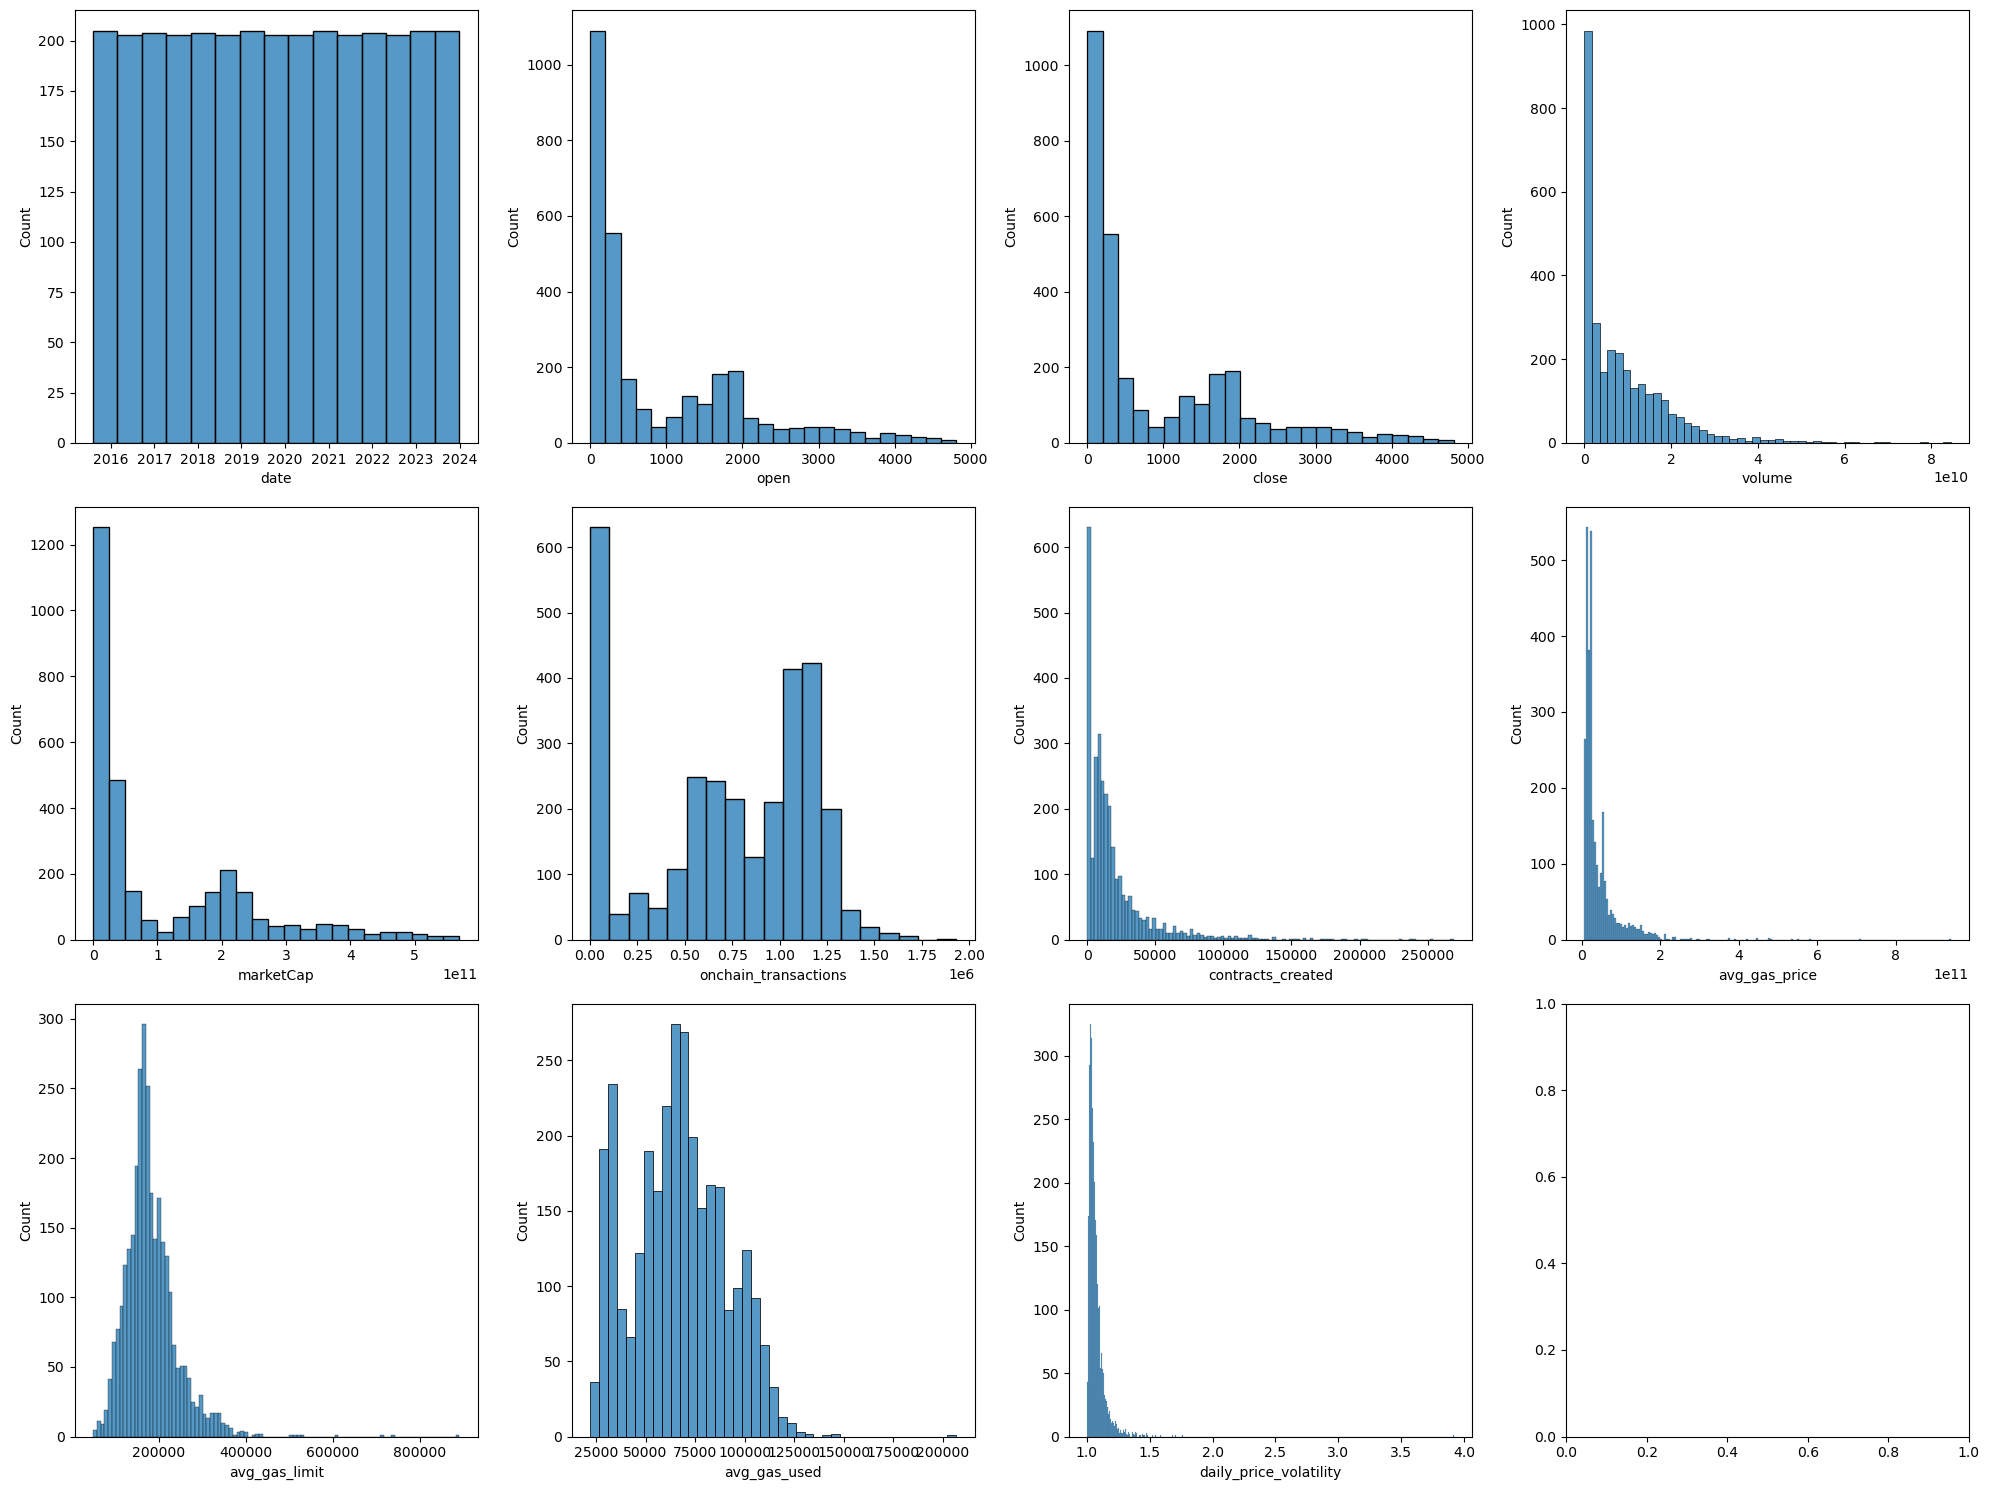

In [95]:
plot_num = 1

plt.subplots(3,4, figsize=(20,15))

for col in df.columns:
    plt.subplot(3,4,plot_num)
    sns.histplot(df[col])
    #go to next plot
    plot_num +=1

plt.tight_layout()
plt.show()

With metrics such as open, close, volume, marketcap we see skewed distributions. 
This is expected due to the trend of our data, given our knowledge of ethereums growth in price, the values at our peaks serve as the values in the skew.

Where we may not expect a guarenteed/constant increase are in metrics not inherently known to be tied to price such as contracts created, gas price, and number of transactions.

transactions has a fairly normal distribution, however contracts created and gas price metrics are skewed, some with large outliers.

We can also look at these metrics over time to give potential clues on why their value distribution is the way it is.

C:\Users\arman\AppData\Local\Temp\ipykernel_29444\2871633519.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,plot_num)


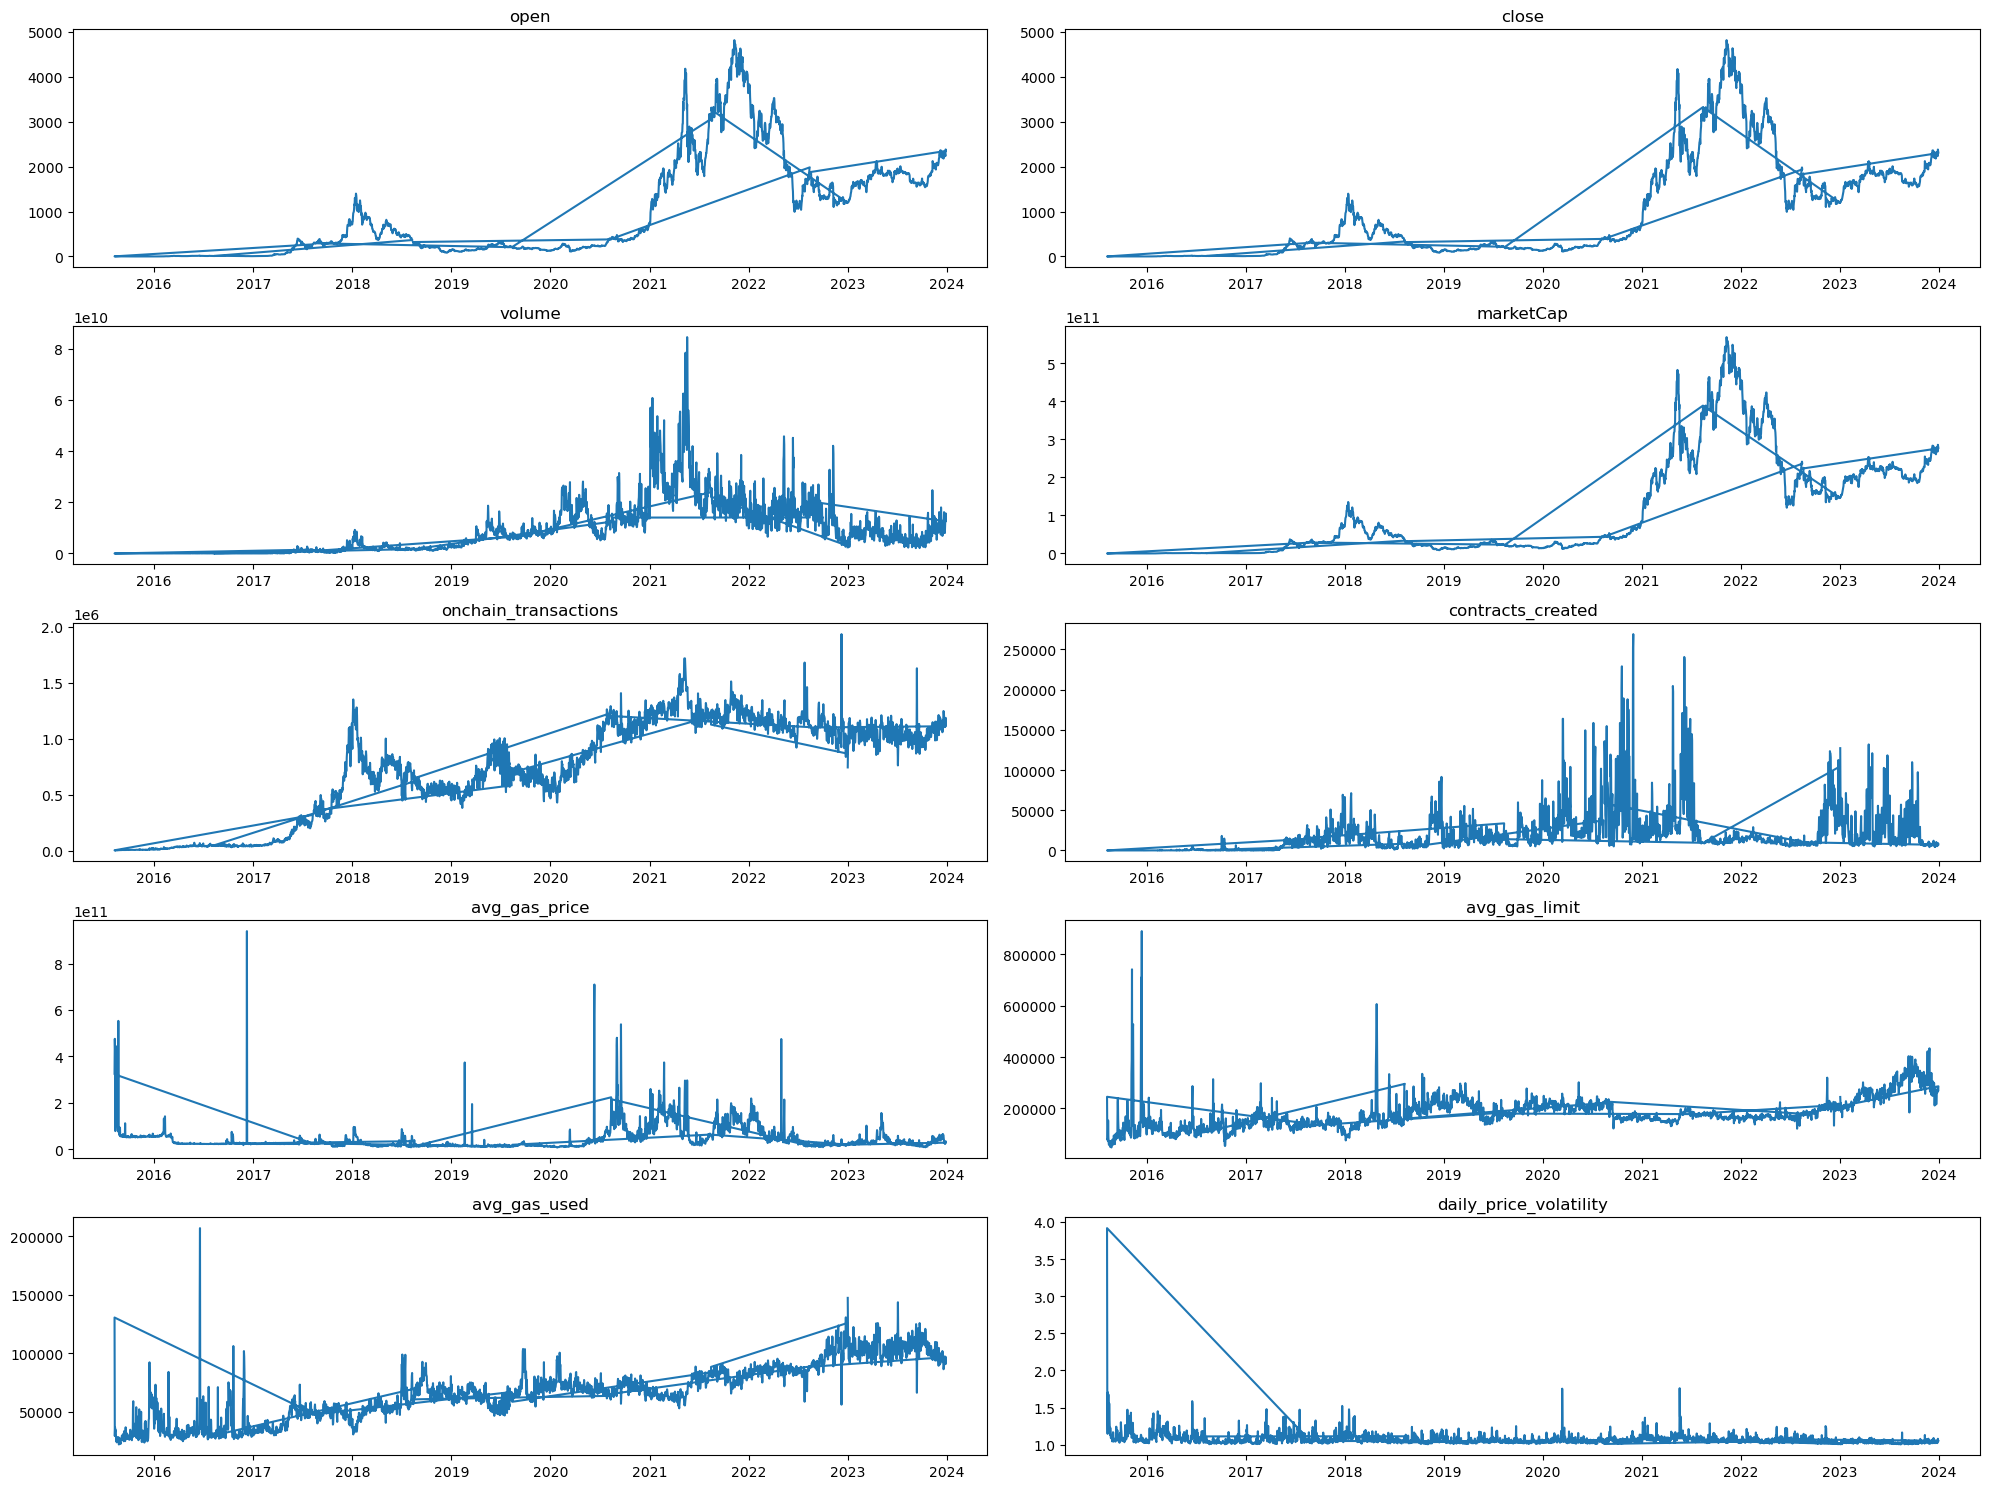

In [96]:
plot_num = 1

plt.subplots(3,4, figsize=(20,15))

for col in df.columns[1:]:
    plt.subplot(5,2,plot_num)
    plt.plot(df['date'], df[col])
    plt.title(col)
    #go to next plot
    plot_num +=1

plt.tight_layout()
plt.show()

In terms of trends:
    - open, close, and marketcap are closely related, essentially showing the same patterns
    - volume and onchain transactions follows the trend established by marketcap loosely but still has its own behavior
    - contracts created, gas metrics, and price volatility are even lesser in their pattern following in relation to marketcap

Given our token dates:
    - We can compare trends in tokens over time to the metrics on the ethereum platform
    - I imagine volume and transactions could have impact on the growth of a token

Let's prepare some columns to be exported and merged with our token dataframe to potentially provide additional insights for our model

First let's adjust the gas price from wei units to a more standardly used gwei unit

In [98]:
df['avg_gas_price_gwei'] = df['avg_gas_price'] / 1_000_000_000

Let's try using these datapoints to merge with our token data. These are unique datapoints from our table, with the highest impact in our domain. Other metrics missing here are either closely related to a metric weve included or can be derived from a combination of metrics

In [101]:
eth_df = df[['date', 'open', 'volume', 'onchain_transactions', 'contracts_created', 'avg_gas_price_gwei', 'daily_price_volatility']]

In [102]:
eth_df.to_csv('../data/eth_data_for_tokens.csv', index=False)

**Note**

During our preliminary analysis we found no correlation in charting by date nor any improvement in machine learning performance by including this data. We may think of ways to feature engineer this data in such way that it may be helpful, such as grouping by month, or showing change over time in various metrics. 

But as it currently stands this is beyond the scope of this project. 